# More Matplotlib

<div align="center"><img src="https://raw.githubusercontent.com/TaraKhodaei/ISC-3313/master/images/compass.gif" width="50%"/></div>

## Standard Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

So far we have been using the `plt.plot()` method for all of our plotting needs. This is often refered to as the *MATLAB-style* 

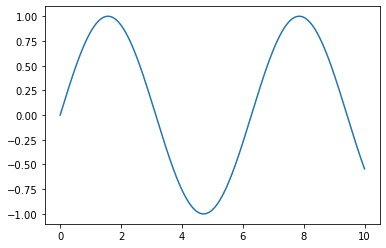

In [2]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

For more control over our figure and axes there are functions to create them explicitly. This is known as the *object oriented style*

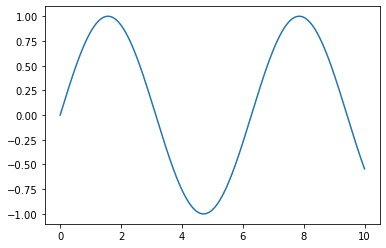

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.

The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

We'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.

In particular, functions to set limits, labels, and titles are slightly modified.

For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

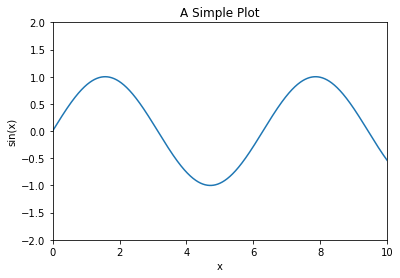

In [4]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side. 

To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. 

These subplots might be insets, grids of plots, or other more complicated layouts. 

In this section we'll explore specifically the grids of plots for creating subplots in Matplotlib.

For this purpose, ``plt.subplots()`` is the  tool to use. 

This function creates a full grid of subplots, returning them in a NumPy array.

The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

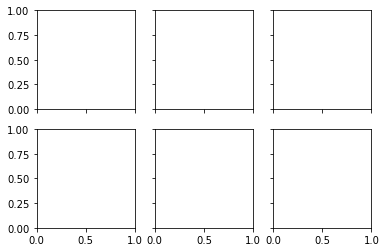

In [5]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.

The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

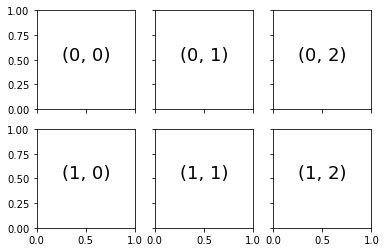

In [6]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## Exercise

Create a 3x1 suplot with the following plots:

- $y=\sin(x)$
- $y=\cos(x)$
- $y=\tan(x)$

All on the domain $0\leq x\leq 2\pi$. Add titles and axis labels to all plots. Set the y-axis to range between -1.2 and 1.2 on all plots. **Note**: Running the command `plt.tight_layout()` will adjust the figure such that titles won't overlap

# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.

There are two Matplotlib functions we will use for this task: ``plt.contour`` for contour plots and ``plt.contourf`` for filled contour plots.

## Visualizing a Three-Dimensional Function

A contour plot can be created with the ``plt.contour`` function.

It takes three arguments: 

- a grid of *x* values
- a grid of *y* values
- a grid of *z* values.

The x and y values represent positions on the plot, and the z values will be represented by the contour levels.

### Creating grids with `np.meshgrid`

Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays

For example, if we pass in the arrays $x = [1,2,3]$ and $y = [4,5,6,7]$, we would get the arrays

<div align="center"><img src="https://raw.githubusercontent.com/TaraKhodaei/ISC-3313/master/images/meshgrid.png" width="80%"/></div>

In [7]:
x = np.arange(1, 4)
y = np.arange(4, 8)

X, Y = np.meshgrid(x, y)

print(X, Y, sep='\n\n')

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]

[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


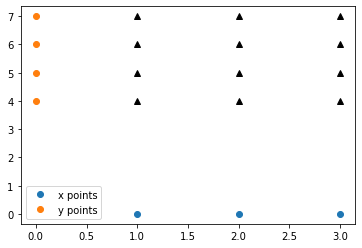

In [8]:
plt.plot(x, np.zeros_like(x), 'o', label = 'x points')
plt.plot(np.zeros_like(y), y, 'o', label = 'y points')
plt.plot(X, Y, '^k')
plt.legend();

We'll create a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$:

$$
f(x, y) = \sin(x)^{10} + \cos(10 + y x) \cos(x)
$$

In [9]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [10]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

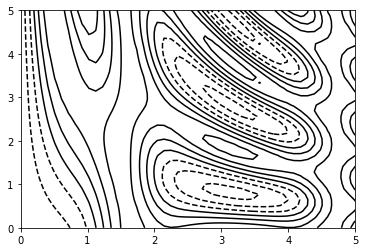

In [11]:
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.

Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.

Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

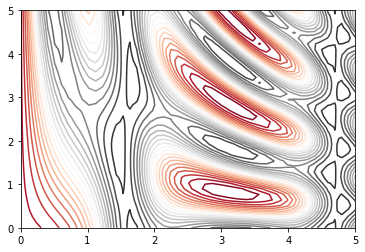

In [12]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.

Matplotlib has a [wide range of colormaps](https://matplotlib.org/examples/color/colormaps_reference.html) available, which you can easily browse in Jupyter by doing a tab completion on the ``plt.cm`` module:
```
plt.cm.<TAB>
```

In [13]:
plt.cm

<module 'matplotlib.cm' from '/anaconda3/lib/python3.7/site-packages/matplotlib/cm.py'>

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.

We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

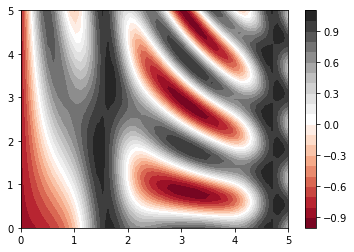

In [14]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

## Exercise

Create a filled contour plot of the function:

$$
f(x, y) = \left(1 - \frac{x}{2} + x^5 + y^3\right)e^{-x^2 - y^2}
$$

on the domain $x, y = [-3, 3]$. Add a color bar and choose your own color map.

# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.

Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.

Three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [15]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

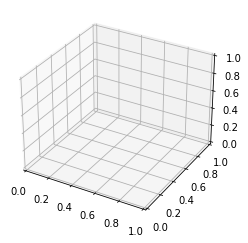

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.

In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` function.

The call signature for these is nearly identical to that of their two-dimensional counterparts.

Here we'll plot the parametric function: 

$$\begin{align*} 
    x(t) &= \cos(t)\\
    y(t) &= \sin(t)\\
    z(t) &= t
\end{align*}$$

from $t = 0$ to $t=10\pi$.

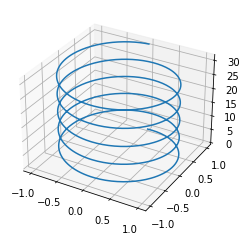

In [17]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
t = np.linspace(0, 10*np.pi, 1000)

x = np.sin(t)
y = np.cos(t)
z = t

ax.plot3D(x, y, z);

## Exercise

Plot the parametric curve
$$\begin{align*} 
    x(t) &= \sin(3t)\\
    y(t) &= \cos(5t)\\
    z(t) &= \sin(t)
\end{align*}$$
from $t=0$ to $t=2\pi$. Try creating a stand alone script to visualize the curve.

## Three-dimensional Contour Plots

Analogous to the contour plots we explored earlier, ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs.

Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.

Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [18]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

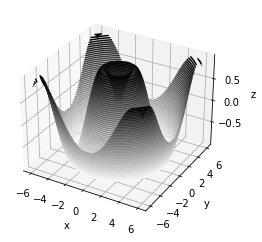

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the ``view_init`` method to set the elevation and azimuthal angles. 

We'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

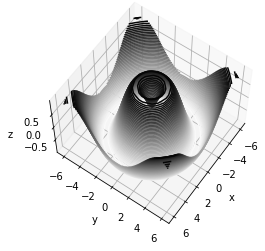

In [20]:
ax.view_init(60, 35)
fig

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.

These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.

Here's an example of using a wireframe:

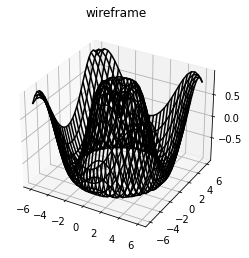

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

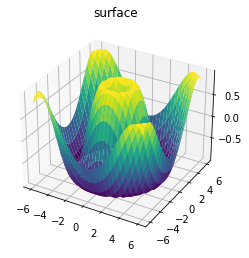

In [22]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

## Exercise

Create a 3d surface plot of the function from earlier:

$$
f(x, y) = \left(1 - \frac{x}{2} + x^5 + y^3\right)e^{-x^2 - y^2}
$$

on the domain $x, y = [-3, 3]$. Change the viewing angle. (You can copy and paste)